### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter




new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np


### Non-cut stationary bulk problem (poisson.cpp)

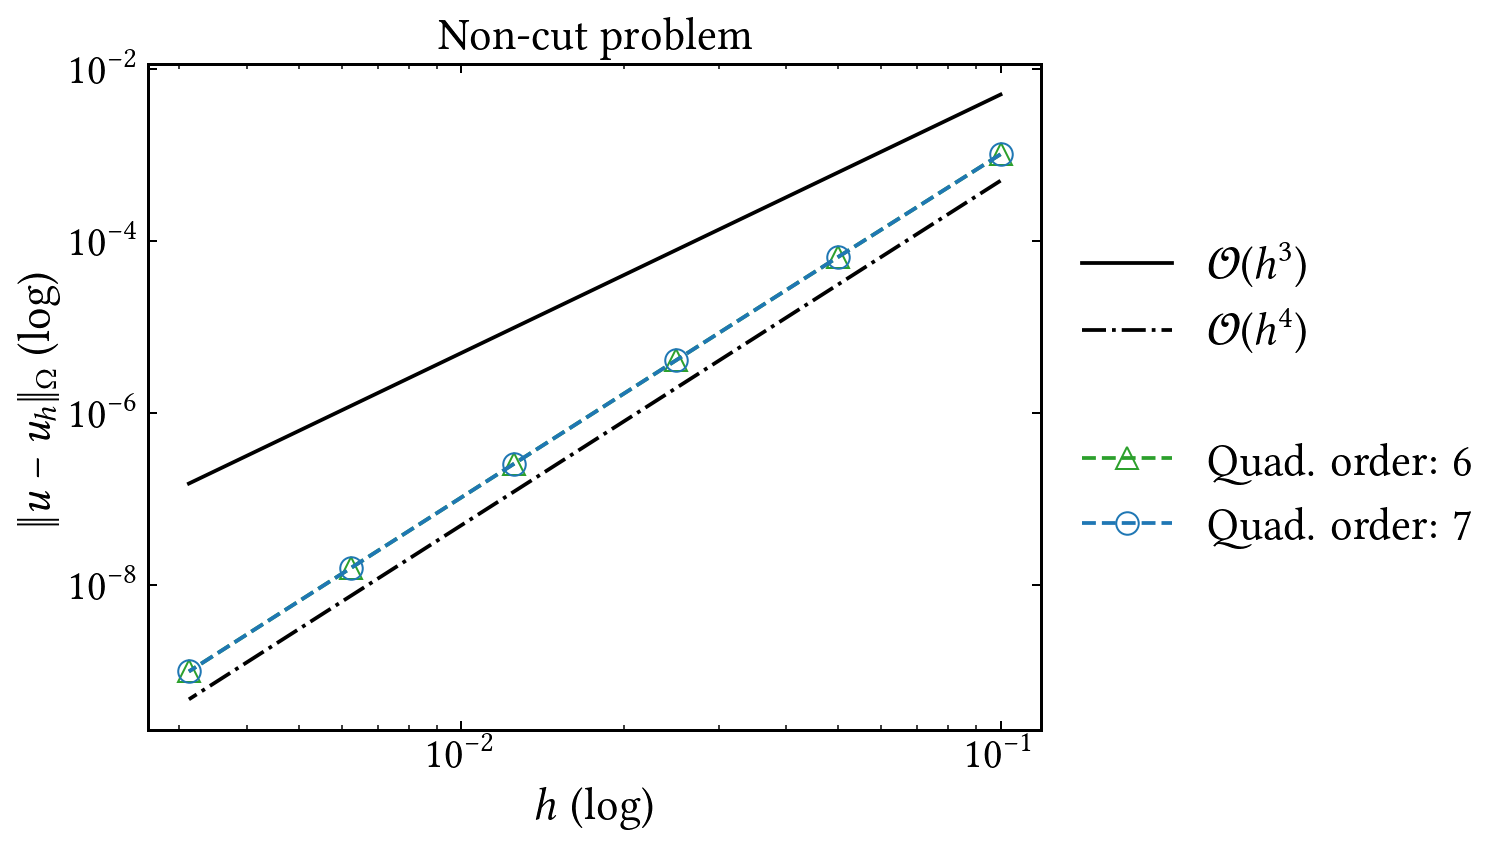

In [2]:
# P3 x P3
error_P3P3_N6 = [0.001012822735477579, 6.515016514487229e-05, 4.101145141942535e-06, 2.567804145455067e-07, 1.605625360322559e-08, 1.004712434583589e-09]
error_P3P3_N7 = [0.001012822735477579, 6.515016514487229e-05, 4.101145141942535e-06, 2.567804145455067e-07, 1.605625360322559e-08, 1.004712434583589e-09]
#error_P3P3_N8 = 

h = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125]


# vs h
fig2, ax2 = plt.subplots()

ax2.loglog(h, 5.e-0*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")
ax2.loglog(h, 5.e-0*np.power(h, 4), label=r"$\mathcal{O}(h^{4})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog(h, error_P3P3_N6, marker='^', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2", label=r"Quad. order: $6$")
ax2.loglog(h, error_P3P3_N7, marker='o', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0", label=r"Quad. order: $7$")
#ax2.loglog(h, error_P3P3_N8, marker='s', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3", label=r"Quad. order: $8$")
ax2.legend(prop={'size': 18},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u-u_h\|_{\Omega}$ (log)", fontsize=18)
ax2.set_title(r"Non-cut problem", fontsize=18)
plt.show()

### Stationary bulk problem (stationary_bulk.cpp)

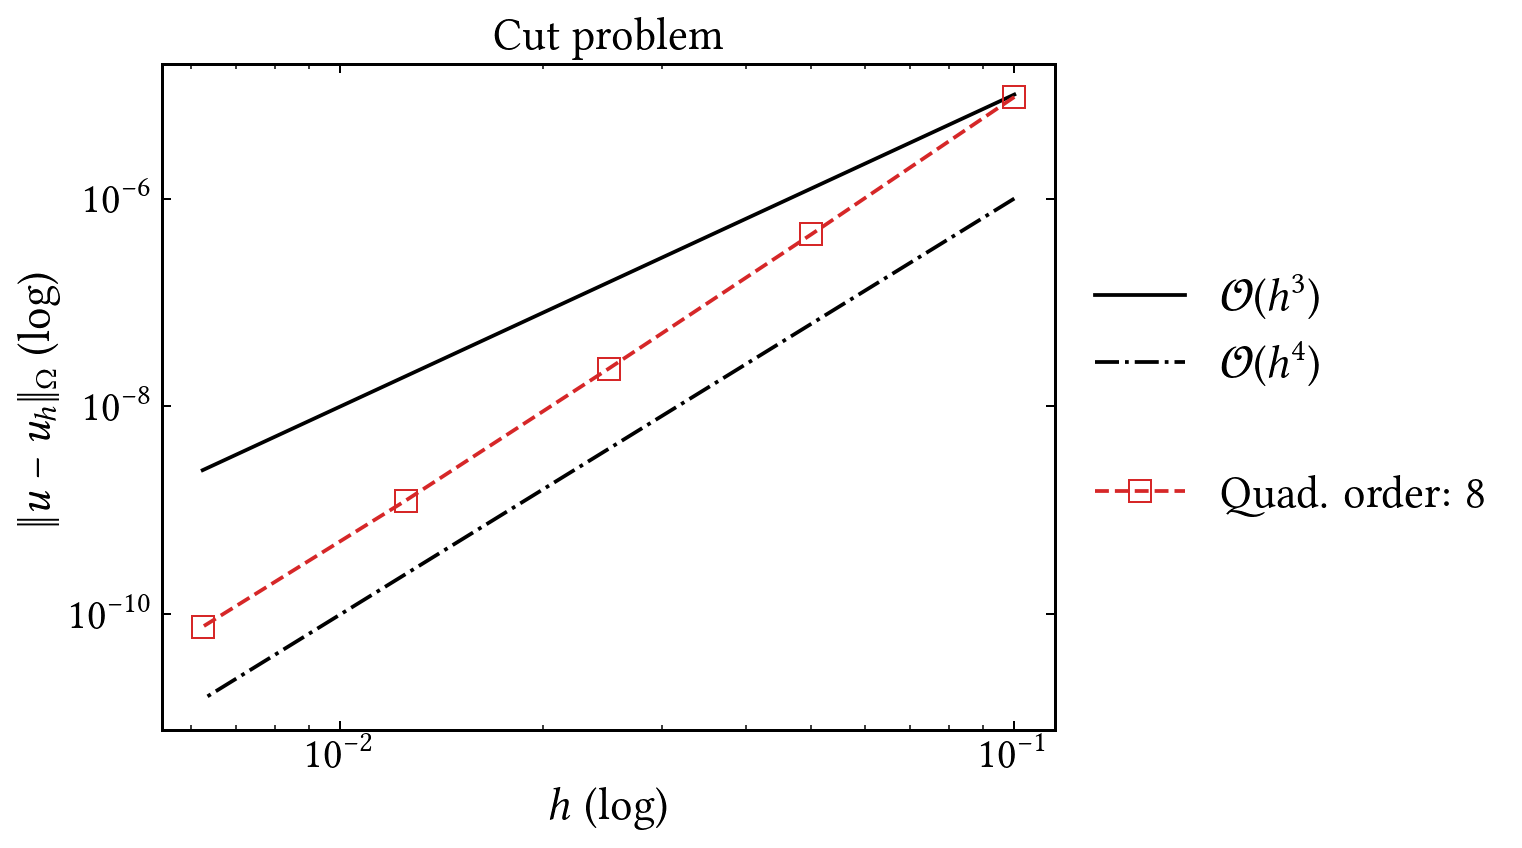

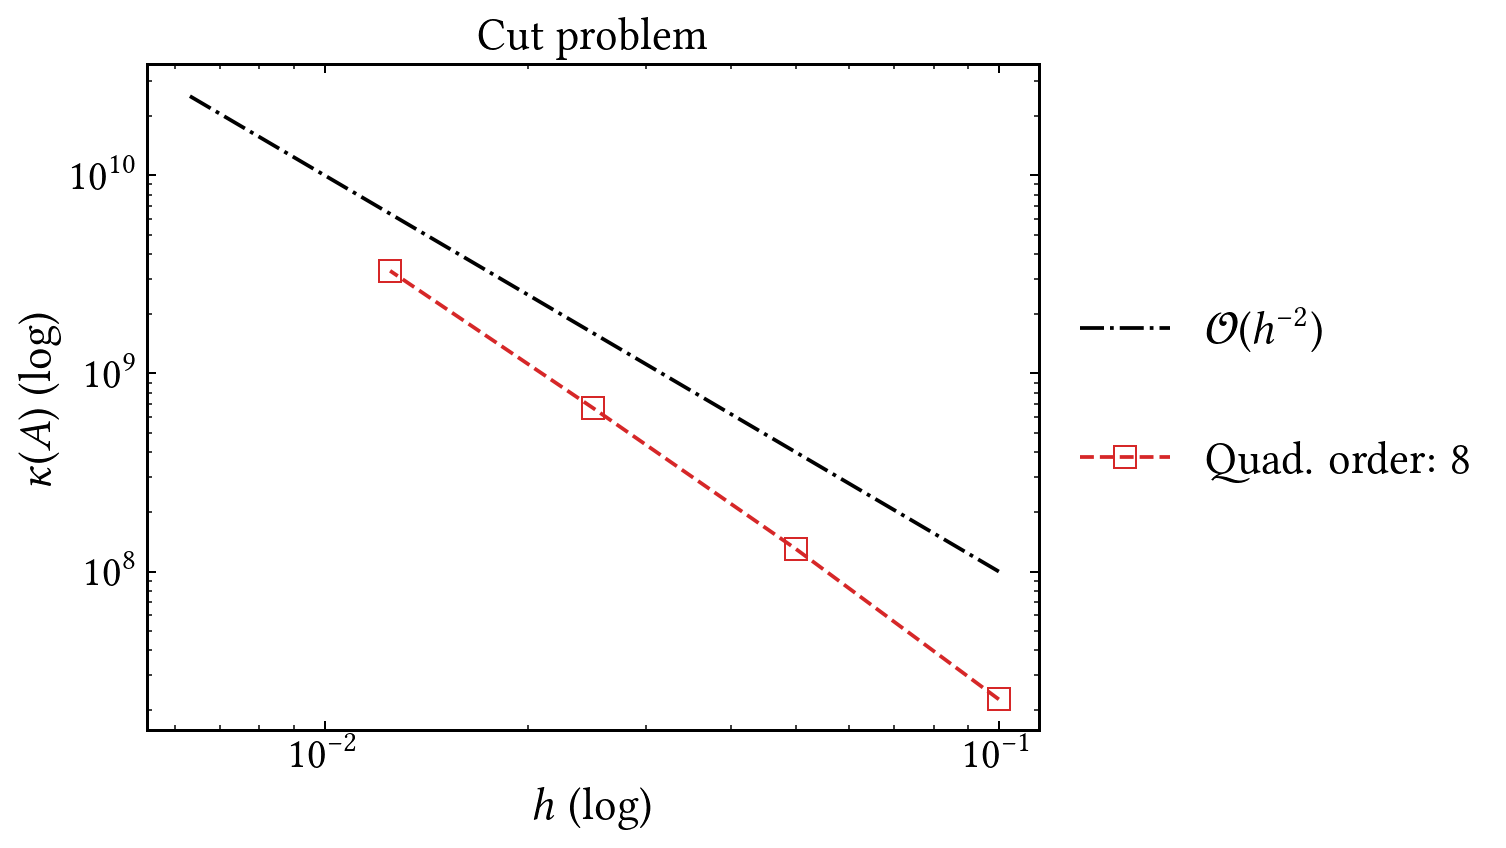

In [7]:
# P3 x P3
error_P3P3_N6 = [6.129010719899448e-06, 3.233591897538822e-07, 58.38861256957789, 1.094768209949467e-09, 3.735815973450803e-08]
error_P3P3_N7 = [6.129020570109367e-06, 3.233593203808625e-07, 209.8924000241353, 1.109165047441025e-09, 332.9601019956083]
error_P3P3_N8 = [6.129020673048207e-06, 3.233593125627206e-07, 1.838924440136452e-08, 1373.906794380217, 25.23998243527805]

# N = 6
error_P3P3_patch = [9.469487147899128e-06, 4.53022523656307e-07, 2.30640364866615e-08, 1.243827988361037e-09, 7.609286052460317e-11]
cond_P3P3_patch = [2.263211e+07,1.299867e+08,6.693589e+08,3.298042e+09]

error_P3P3_patch_N5 = [9.51174801210054e-06, 4.554849261863899e-07, 2.322053522220627e-08, 1.246358312435469e-09, 7.137702887196215e-11]
cond_P3P3_patch_N5 = 

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

# vs h
fig2, ax2 = plt.subplots()

ax2.loglog(h, 1.e-2*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")
ax2.loglog(h, 1.e-2*np.power(h, 4), label=r"$\mathcal{O}(h^{4})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
#ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=3$")
#ax2.loglog(h, error_P3P3_N6, marker='^', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2", label=r"Quad. order: $6$")
#ax2.loglog(h, error_P3P3_N7, marker='o', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0", label=r"Quad. order: $7$")
#ax2.loglog(h, error_P3P3_N8, marker='s', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3", label=r"Quad. order: $8$")
ax2.loglog(h, error_P3P3_patch, marker='s', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3", label=r"Quad. order: $8$")
ax2.legend(prop={'size': 18},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u-u_h\|_{\Omega}$ (log)", fontsize=18)
ax2.set_title(r"Cut problem", fontsize=18)
plt.show()


fig, ax = plt.subplots()

#ax.loglog(h, 1.e-2*np.power(h, 3), label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="black")
ax.loglog(h, 1.e6*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax.loglog([],[], linestyle="None", label=" ")
#ax.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=3$")
#ax.loglog(h, error_P3P3_N6, marker='^', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2", label=r"Quad. order: $6$")
#ax.loglog(h, error_P3P3_N7, marker='o', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0", label=r"Quad. order: $7$")
#ax.loglog(h, error_P3P3_N8, marker='s', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3", label=r"Quad. order: $8$")
ax.loglog(h[:-1], cond_P3P3_patch, marker='s', markersize=9,  markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3", label=r"Patch stabilization")
ax.legend(prop={'size': 18},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)

ax.set_xlabel(r"$h$ (log)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel(r"$\kappa(A)$ (log)", fontsize=18)
ax.set_title(r"Cut problem", fontsize=18)
plt.show()